## White Wine Quality Prediction

Given *data about various white wines*, let's try to predict the **quality** of a particular wine, according to experts.

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/piyushagni5/white-wine-quality

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-06-08 23:21:59.746057: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Visualization

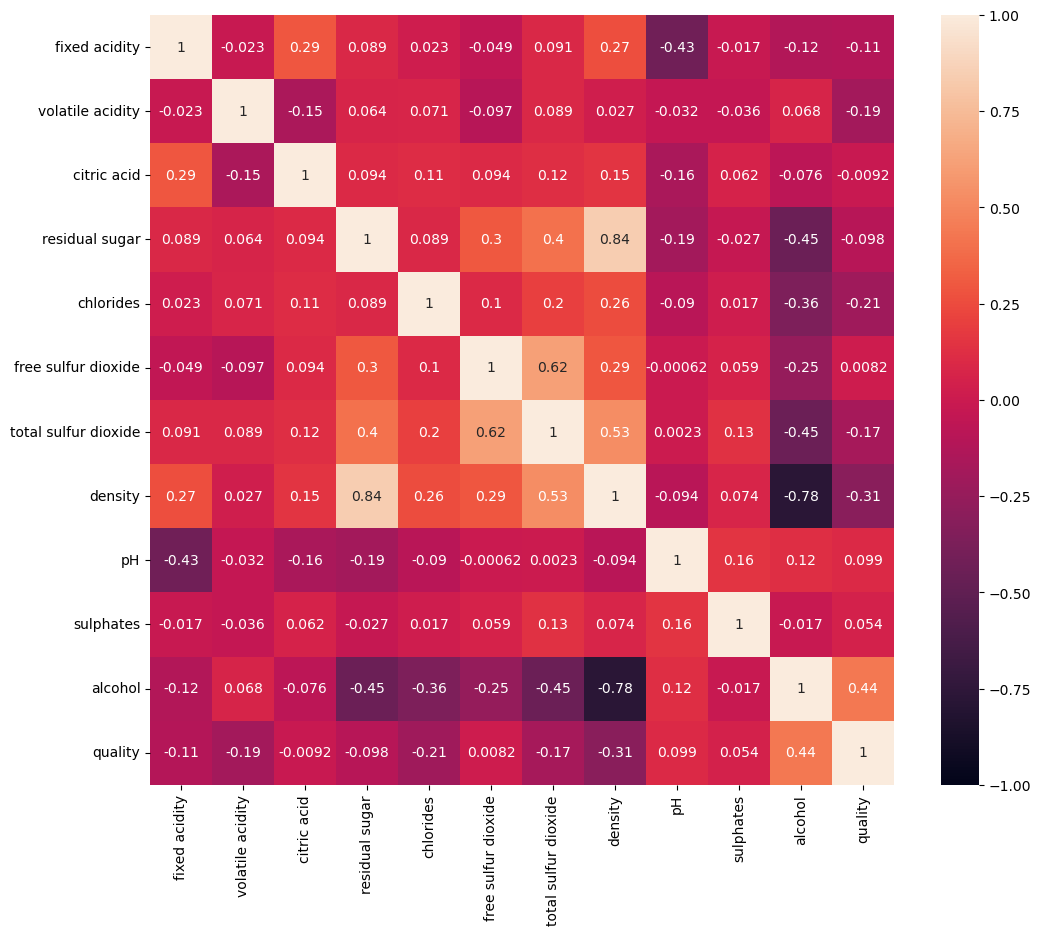

In [4]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### Preprocessing

In [5]:
print("Total null values: ", data.isna().sum().sum())

Total null values:  0


In [6]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [7]:
encoder = LabelEncoder()

data['quality'] = encoder.fit_transform(data['quality'])

{index: label for index, label in enumerate(encoder.classes_)}

{0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8, 6: 9}

In [8]:
data['quality'].unique()

array([3, 2, 4, 5, 1, 0, 6])

In [9]:
y = data['quality']
X = data.drop('quality', axis=1)

In [10]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [11]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

In [13]:
X_train.shape, X_test.shape

((3428, 11), (1470, 11))

### Modeling and Training

In [14]:
num_features = X_train.shape[1]
print(num_features)

11


In [15]:
num_classes = len(y.unique())
print(num_classes)

7


In [16]:
inputs = tf.keras.Input(shape=(num_features, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

2025-06-08 23:22:02.247517: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model = tf.keras.Model(inputs, outputs)

In [18]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [31]:
batch_size = 32
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
86/86 [==============================] - 0s 5ms/step - loss: 0.5837 - accuracy: 0.7739 - val_loss: 1.2232 - val_accuracy: 0.5787 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7739 - val_loss: 1.2332 - val_accuracy: 0.5729 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 1s 7ms/step - loss: 0.5726 - accuracy: 0.7743 - val_loss: 1.2280 - val_accuracy: 0.5641 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 0s 5ms/step - loss: 0.5710 - accuracy: 0.7717 - val_loss: 1.2195 - val_accuracy: 0.5816 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 1s 6ms/step - loss: 0.5690 - accuracy: 0.7819 - val_loss: 1.2342 - val_accuracy: 0.5729 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 1s 6ms/step - loss: 0.5647 - accuracy: 0.7801 - val_loss: 1.2387 - val_accuracy: 0.5758 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 0s 5ms/step - loss: 0.5

### Results

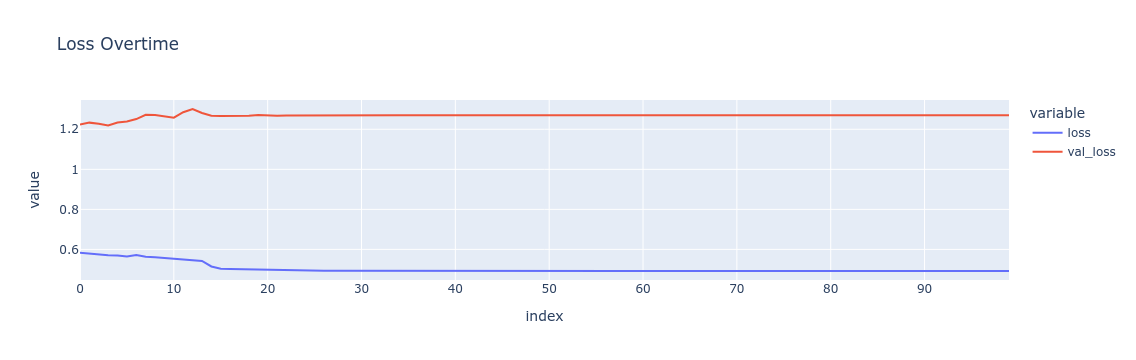

In [32]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'x': 'Epoch', 'y': 'Loss'},
    title='Loss Overtime'
)
fig.show()

In [33]:
model.evaluate(X_test, y_test)

46/46 [==============================] - 0s 5ms/step - loss: 1.2342 - accuracy: 0.5918


[1.2341915369033813, 0.5918367505073547]

In [34]:
y.value_counts().sort_index()

quality
0      20
1     163
2    1457
3    2198
4     880
5     175
6       5
Name: count, dtype: int64

### Re-structure the task:

Let's try quantile-splitting the outputs into two categories: high quality wines and low quality wines.

In [35]:
pd.qcut(data['quality'], q=2, labels= [0,1]).value_counts()

quality
0    3838
1    1060
Name: count, dtype: int64

In [36]:
y2 = pd.qcut(data['quality'], q=2, labels= [0,1])
X2 = data.drop('quality', axis=1)

In [37]:
scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.7, random_state=34)

In [41]:
inputs2 = tf.keras.Input(shape=(num_features, ))
x2 = tf.keras.layers.Dense(64, activation='relu')(inputs2)
x2 = tf.keras.layers.Dense(64, activation='relu')(x2)
outputs2 = tf.keras.layers.Dense(1, activation='sigmoid')(x2)
model2 = tf.keras.Model(inputs2, outputs2)

model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 100

history2 = model2.fit(
    X_train2,
    y_train2,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4617 - accuracy: 0.8023 - val_loss: 0.4621 - val_accuracy: 0.7726 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3929 - accuracy: 0.8180 - val_loss: 0.4436 - val_accuracy: 0.7784 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - 0s 6ms/step - loss: 0.3727 - accuracy: 0.8282 - val_loss: 0.4256 - val_accuracy: 0.7741 - lr: 0.0010
Epoch 4/100
86/86 [==============================] - 0s 5ms/step - loss: 0.3608 - accuracy: 0.8264 - val_loss: 0.4312 - val_accuracy: 0.7697 - lr: 0.0010
Epoch 5/100
86/86 [==============================] - 0s 5ms/step - loss: 0.3520 - accuracy: 0.8330 - val_loss: 0.4399 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 6/100
86/86 [==============================] - 0s 5ms/step - loss: 0.3477 - accuracy: 0.8399 - val_loss: 0.4271 - val_accuracy: 0.7828 - lr: 0.0010
Epoch 7/100
86/86 [==============================] - 0s 4ms/step - loss: 0.3

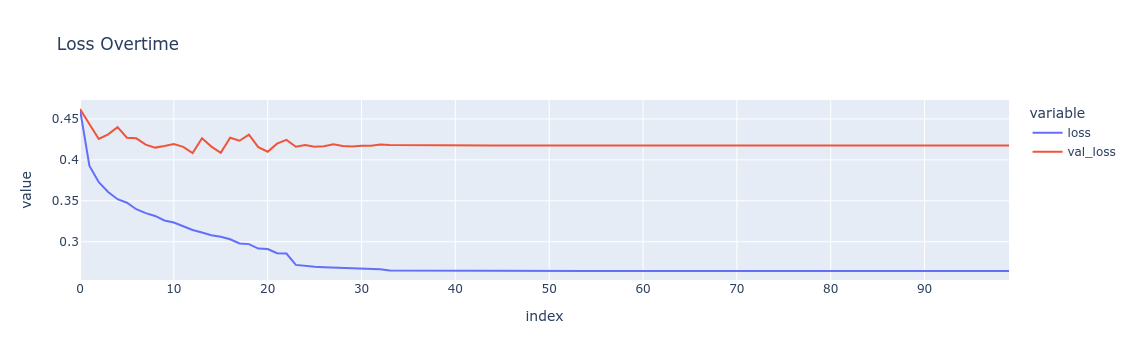

In [42]:
fig = px.line(
    history2.history,
    y=['loss', 'val_loss'],
    labels={'x': 'Epoch', 'y': 'Loss'},
    title='Loss Overtime'
)
fig.show()

In [44]:
model2.evaluate(X_test2, y_test2)

46/46 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.8279


[0.36895033717155457, 0.8278911709785461]